In [1]:
from matplotlib import pylab as plt
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
import numpy as np
import scipy

# Fig3.A

In [2]:
fig3a_data = scipy.io.loadmat("fig3a.mat", simplify_cells=True)
meas_ops = fig3a_data["meas_ops"]
xs = np.arange(len(meas_ops))
sim_values = fig3a_data["sim_values"]
exp_values = fig3a_data["exp_values"]

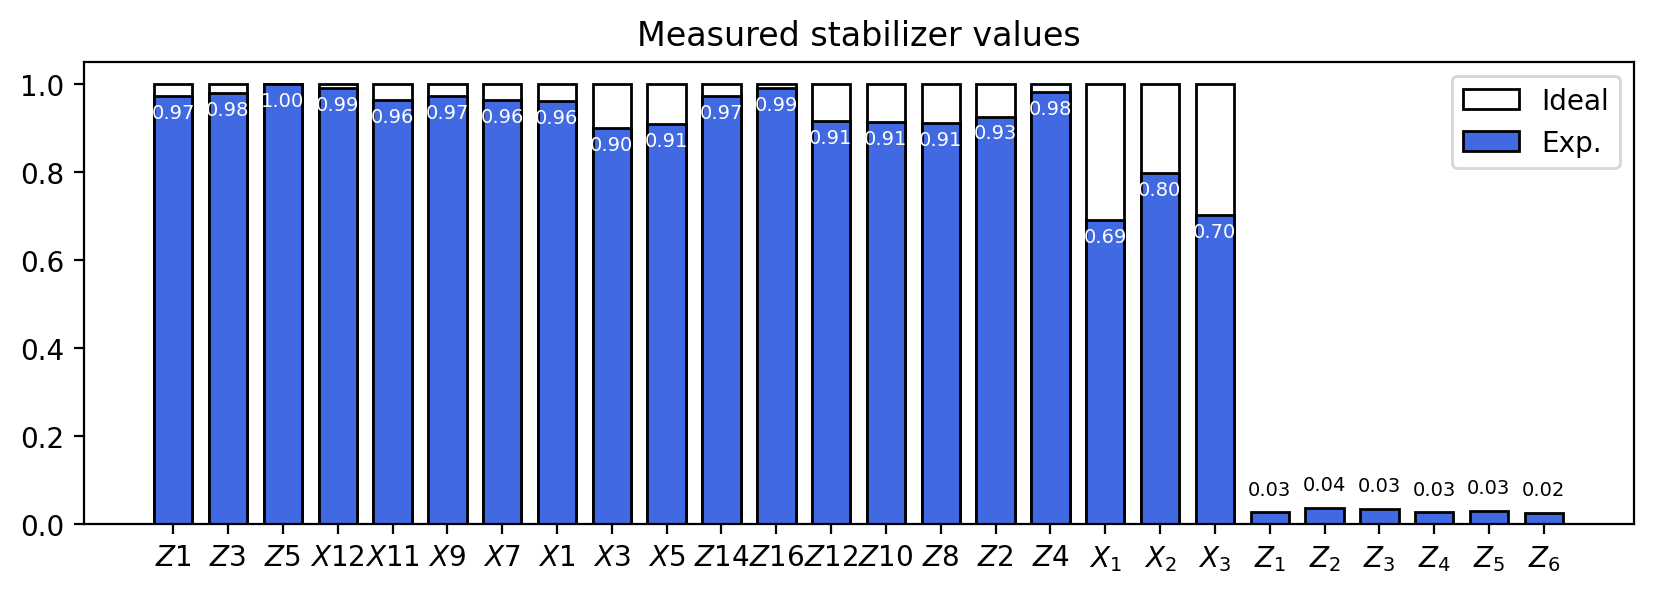

In [3]:
plt.figure(figsize=(10, 3), dpi=200)
plt.bar(xs, sim_values, width=0.7, ec="k", fc="none", label="Ideal")
plt.bar(xs, exp_values, width=0.7, ec="k", fc="royalblue", label="Exp.")
for x, y in zip(xs, exp_values.tolist()):
    if y > 0.05:
        plt.text(x - 0.4, y - 0.05, "{:.2f}".format(y), fontsize=7, color="w")
    else:
        plt.text(x - 0.4, y + 0.04, "{:.2f}".format(y), fontsize=7, color="k")
plt.xticks(xs, [r"$" + ss.replace(" ", "") + r"$" for ss in meas_ops])
plt.title("Measured stabilizer values")
plt.legend(loc="best")

# Fig3.B

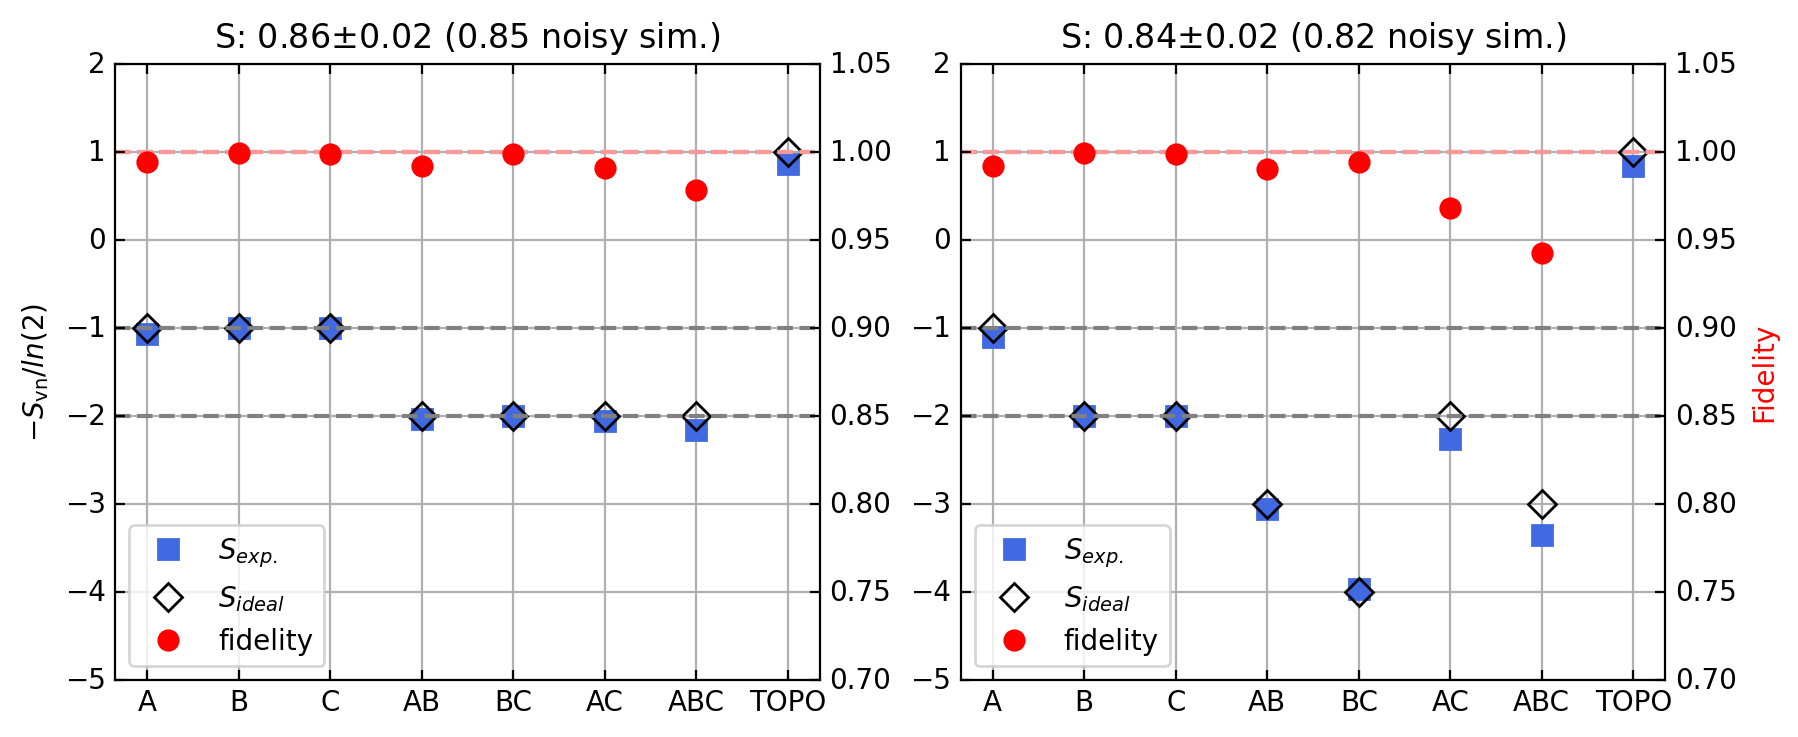

In [4]:
fig3b_data = scipy.io.loadmat("fig3b.mat", simplify_cells=True)
topo_names = [s.replace(" ", "") for s in fig3b_data["topo_names"]]

# tomo 4
S_exp_avg = fig3b_data["tomo4"]["S_exp_avg"]
S_exp_err = fig3b_data["tomo4"]["S_exp_err"]
S_sim = fig3b_data["tomo4"]["S_sim"]
S_topo_nsim = fig3b_data["tomo4"]["S_topo_sim"]
F_exp_avg = fig3b_data["tomo4"]["F_exp_avg"]

fig = plt.figure(figsize=(10, 4), dpi=200)
host = host_subplot(121, figure=fig, axes_class=axisartist.Axes)
par1 = host.twinx()
par1.axis["right"].toggle(all=True)
host.plot(
    np.arange(len(topo_names)),
    S_exp_avg,
    linewidth=0.0,
    marker="s",
    markersize=7,
    color="royalblue",
    label=r"$S_{exp.}$",
)
host.plot(
    np.arange(len(topo_names)),
    S_sim,
    "D",
    markerfacecolor="none",
    markersize=7,
    color="#000000",
    label=r"$S_{ideal}$",
)
host.axhline(1, color="gray", ls="--")
host.axhline(-1, color="gray", ls="--")
host.axhline(-2, color="gray", ls="--")
par1.axhline(1, color="#ff9999", ls="--")
par1.plot(
    np.arange(len(topo_names[:-1])),
    F_exp_avg,
    linewidth=0.0,
    marker="o",
    markersize=7,
    color="red",
    label="fidelity",
)
host.set_ylim([-5, 2])
par1.set_ylim([0.7, 1.05])
host.set_ylabel(r"$-S_{\rm{vn}}/ln(2)$")
# par1.set_ylabel("fidelity")
plt.grid("on")
plt.xticks(np.arange(len(topo_names)), topo_names)
plt.legend()
plt.title(
    f"S: {np.round(S_exp_avg[-1],2)}"
    + r"$\pm$"
    + f"{np.round(S_exp_err[-1],2)}"
    + f" ({np.round(S_topo_nsim, 2)} noisy sim.)"
)

# tomo 6
S_exp_avg = fig3b_data["tomo6"]["S_exp_avg"]
S_sim = fig3b_data["tomo6"]["S_sim"]
S_topo_nsim = fig3b_data["tomo6"]["S_topo_sim"]
F_exp_avg = fig3b_data["tomo6"]["F_exp_avg"]

host = host_subplot(122, figure=fig, axes_class=axisartist.Axes)
par1 = host.twinx()
par1.axis["right"].toggle(all=True)
host.plot(
    np.arange(len(topo_names)),
    S_exp_avg,
    linewidth=0.0,
    marker="s",
    markersize=7,
    color="royalblue",
    label=r"$S_{exp.}$",
)
host.plot(
    np.arange(len(topo_names)),
    S_sim,
    "D",
    markerfacecolor="none",
    markersize=7,
    color="#000000",
    label=r"$S_{ideal}$",
)
host.axhline(1, color="gray", ls="--")
host.axhline(-1, color="gray", ls="--")
host.axhline(-2, color="gray", ls="--")
par1.axhline(1, color="#ff9999", ls="--")
par1.errorbar(
    np.arange(len(topo_names[:-1])),
    F_exp_avg,
    linewidth=0.0,
    marker="o",
    markersize=7,
    color="red",
    label="fidelity",
)
host.set_ylim([-5, 2])
par1.set_ylim([0.7, 1.05])
# host.set_ylabel(r"$-S_{\rm{vn}}/ln(2)$")
par1.set_ylabel("Fidelity", color="red", rotation=90)
plt.grid("on")
plt.xticks(np.arange(len(topo_names)), topo_names)
plt.title(
    f"S: {np.round(S_exp_avg[-1],2)}"
    + r"$\pm$"
    + f"{np.round(S_exp_err[-1],2)}"
    + f" ({np.round(S_topo_nsim, 2)} noisy sim.)"
)
plt.legend()
# plt.show()